<a href="https://colab.research.google.com/github/Danusyasundaravel/Topic-modelling/blob/main/Topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 14.1 MB/s eta 0:00:00


In [2]:
import pypdf
from pypdf import PdfReader
import os
def extract_text_from_pdf(pdf_path):
    text = ""
    reader = PdfReader(pdf_path)
    num_pages = len(reader.pages)
    for page_num in range(num_pages):
            page = reader.pages[page_num]
            text += page.extract_text()
    return text

# pdf_path should be the directory containing your PDFs
pdf_directory = '/content/drive/MyDrive/GLM'
all_text = ""
# Iterate over files within the directory
for pdf_file in os.listdir(pdf_directory):
    # Check if the file is a PDF
    if pdf_file.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, pdf_file)
        pdf_text=extract_text_from_pdf(pdf_path)
        all_text += pdf_text + "\n"
with open('combined_text.txt', 'w', encoding='utf-8') as text_file:
    text_file.write(all_text)

In [3]:
!pip install gensim
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 60.1 MB/s eta 0:00:00


In [4]:
import spacy
import gensim
import nltk
nltk.download('punkt')
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Text Preprocessing**

In [5]:
# Lower case conversion
data=all_text.lower()
data[0:200]

'government of india\ninterim budget 2024-2025\nspeech\nof\nnirmala sitharaman\nminister of finance\nfebruary 1,  2024 \ncontents  \n \npart – a \n page no.  \nintroduction  1 \ninclusive development and growth  2'

In [6]:
# punctutation removal
import string
punctuations = string.punctuation
data = data.translate(str.maketrans('', '', punctuations))
data[0:200]

'government of india\ninterim budget 20242025\nspeech\nof\nnirmala sitharaman\nminister of finance\nfebruary 1  2024 \ncontents  \n \npart – a \n page no  \nintroduction  1 \ninclusive development and growth  2 \ns'

In [8]:
# Remove special charecters
def remove_special_characters(text):
    special_chars = "\'!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"

    no_special_chars = ''.join([char if char not in special_chars else ' ' for char in text])

    return no_special_chars
data=remove_special_characters(data)
res = "".join(filter(lambda x: not x.isdigit(), data))
print(res[0:65])
new_str = res.replace('"', '')

government of india
interim budget 
speech
of
nirmala sitharaman



In [10]:
# Stopwords removal
from gensim.parsing.preprocessing import remove_stopwords
clean_data = remove_stopwords(res)
print(clean_data[0:155])

government india interim budget speech nirmala sitharaman minister finance february contents – page introduction inclusive development growth social justic


In [11]:
def tolist(string):
    li = list(string.split(" "))
    return li
data=tolist(clean_data)
data[0:10]

['government',
 'india',
 'interim',
 'budget',
 'speech',
 'nirmala',
 'sitharaman',
 'minister',
 'finance',
 'february']

In [12]:
# Lemmatization
import spacy
def lemmatize_words(words):
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    lemmatized_words = [token.lemma_ for token in nlp(" ".join(words))]
    return lemmatized_words

text=lemmatize_words(data)
print(text[0:10])

['government', 'india', 'interim', 'budget', 'speech', 'nirmala', 'sitharaman', 'minister', 'finance', 'february']


(-0.5, 799.5, 799.5, -0.5)

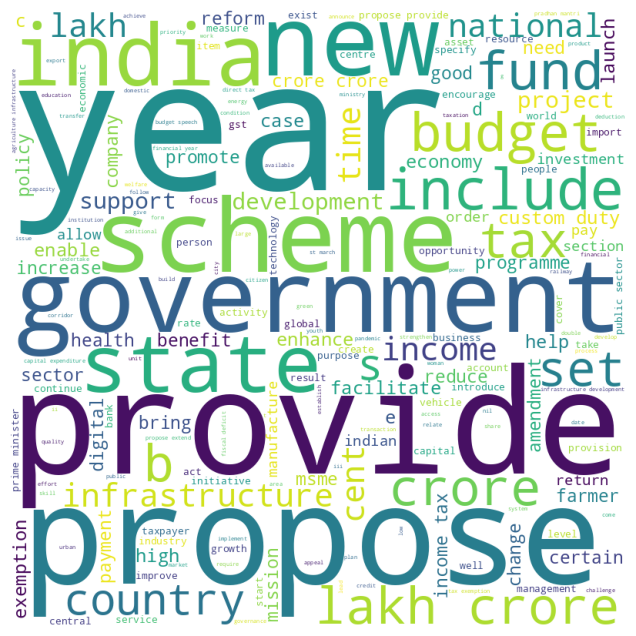

In [13]:
# Distribution of words in the data
from wordcloud import WordCloud
for i in text:
  text1 = " ".join(text)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white').generate(text1)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

In [15]:
# Bigram generation
from nltk.util import ngrams
def generate_word_ngrams(words, n):
    word_ngrams = list(ngrams(words, n))
    return word_ngrams
bigram = generate_word_ngrams(text, 2)
n=2
print(f"{n}-grams for the list of words {text[:20]}:")
print(bigram[:10])


2-grams for the list of words ['government', 'india', 'interim', 'budget', 'speech', 'nirmala', 'sitharaman', 'minister', 'finance', 'february', 'content', '–', 'page', 'introduction', 'inclusive', 'development', 'growth', 'social', 'justice', 'exemplary']:
[('government', 'india'), ('india', 'interim'), ('interim', 'budget'), ('budget', 'speech'), ('speech', 'nirmala'), ('nirmala', 'sitharaman'), ('sitharaman', 'minister'), ('minister', 'finance'), ('finance', 'february'), ('february', 'content')]


CONVERT PREPROCESSED TEXT TO CORPUS

In [17]:
id2word=corpora.Dictionary(bigram)
texts=bigram
corpus=[id2word.doc2bow(word) for word in bigram]

In [19]:
# Tf-idf vectorization
from gensim.models import TfidfModel
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]


In [20]:
# Model to perfrom topic modelling
lda_model = gensim.models.LdaModel(corpus=corpus_tfidf,
                                       id2word=id2word,
                                       num_topics=18)


print(lda_model.print_topics(5))

[(7, '0.106*"increase" + 0.071*"bank" + 0.063*"health" + 0.048*"create" + 0.046*"launch" + 0.045*"loan" + 0.043*"policy" + 0.043*"msme" + 0.039*"indian" + 0.036*"unit"'), (8, '0.139*"nil" + 0.067*"extend" + 0.066*"people" + 0.050*"department" + 0.041*"minimum" + 0.039*"loss" + 0.035*"speaker" + 0.033*"authority" + 0.024*"well" + 0.023*"management"'), (1, '0.114*"state" + 0.082*"end" + 0.057*"trust" + 0.050*"centre" + 0.050*"activity" + 0.047*"f" + 0.032*"atmanirbhar" + 0.030*"opportunity" + 0.023*"effort" + 0.020*"indirect"'), (12, '0.167*"order" + 0.148*"\uf0b7" + 0.121*"development" + 0.056*"–" + 0.053*"t" + 0.039*"bring" + 0.037*"support" + 0.033*"area" + 0.026*"rural" + 0.023*"long"'), (3, '0.167*"change" + 0.073*"housing" + 0.069*"revise" + 0.063*"welfare" + 0.056*"\'" + 0.051*"work" + 0.050*"worker" + 0.030*"major" + 0.029*"bharat" + 0.026*"governance"')]


DISTRIBUTION OF WORDS OVER TOPICS

In [21]:
# Topics and the words associated in each topic
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model,corpus_tfidf,id2word,mds="mmds",R=50)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
9     -0.318606  0.288908       1        1  6.345281
16    -0.112486  0.406033       2        1  6.005441
0      0.125438 -0.393723       3        1  5.937793
17     0.302727 -0.274808       4        1  5.926212
15     0.421303 -0.059602       5        1  5.899959
7      0.145374  0.381720       6        1  5.772304
12     0.302442  0.072355       7        1  5.744644
4      0.347706  0.241875       8        1  5.668080
11    -0.377290  0.092989       9        1  5.606198
2     -0.383016 -0.091459      10        1  5.520126
10    -0.052301 -0.368630      11        1  5.491621
5     -0.157615 -0.247016      12        1  5.455258
13    -0.299735 -0.269906      13        1  5.430753
3     -0.155543  0.037207      14        1  5.230715
8      0.103130  0.213593      15        1  5.211419
1      0.007194 -0.090017      16        1  5.038309
6      0.161976 -0.112755      17        1  4.981411
14    -0.060698  0.173236      18        1  4.734477, topic_info=            Term        Freq       Total Category  logprob  loglift
549          tax  839.000000  839.000000  Default  50.0000  50.0000
191        crore  792.000000  792.000000  Default  49.0000  49.0000
53          year  570.000000  570.000000  Default  48.0000  48.0000
588         rate  510.000000  510.000000  Default  47.0000  47.0000
325      provide  499.000000  499.000000  Default  46.0000  46.0000
..           ...         ...         ...      ...      ...      ...
314           pm    0.264562   23.759026  Topic18  -9.0829  -1.4473
15   development    0.352985  345.741659  Topic18  -8.7945  -3.8367
612            "    0.300494   84.677080  Topic18  -8.9555  -2.5909
414    establish    0.274523   54.181768  Topic18  -9.0459  -2.2348
241       reduce    0.275185  260.857163  Topic18  -9.0435  -3.8040

[1206 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
612       5  0.968385       "
30       14  0.969751       '
30       16  0.006688       '
30       18  0.006688       '
256      11  0.964735  access
...     ...       ...     ...
11        7  0.987421       –
819      11  0.982071       ’
224       4  0.987067      ’s
224       9  0.004182      ’s
124       7  0.994170       

[629 rows x 3 columns], R=50, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 17, 1, 18, 16, 8, 13, 5, 12, 3, 11, 6, 14, 4, 9, 2, 7, 15])

In [22]:
# Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=bigram, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.7349273164181199


In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


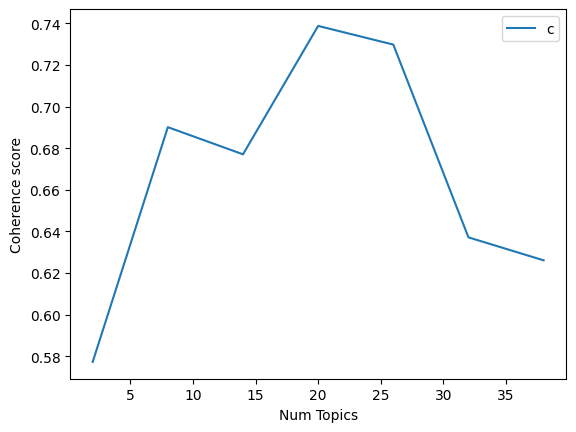

In [24]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus_tfidf, texts=texts, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()